<a href="https://colab.research.google.com/github/pulibharat/salary_price_prediction/blob/main/slaary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
df=pd.read_csv("/content/adult 3.csv")

In [173]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [174]:
print(df.shape)

(48842, 15)


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [176]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [177]:
print(df.isnull().count())

age                48842
workclass          48842
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64


In [178]:
print(df.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [179]:
df.workclass.replace('?', 'others', inplace=True)

/tmp/ipython-input-179-2732237499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace('?', 'others', inplace=True)


In [180]:
print(df.fnlwgt.value_counts())

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
436163     1
320084     1
125976     1
211349     1
120478     1
Name: count, Length: 28523, dtype: int64


In [181]:
df.workclass.isnull().sum()

np.int64(0)

In [182]:
print(df.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [183]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [184]:
df.replace('?','others',inplace=True)

In [185]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [186]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [187]:
df.sample(29)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
22141,27,Private,101364,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K
26238,39,Private,149943,Masters,14,Never-married,Sales,Not-in-family,Asian-Pac-Islander,Male,0,0,40,China,<=50K
33831,24,State-gov,289909,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
34846,42,Self-emp-inc,50122,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
502,36,Local-gov,237713,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
36611,37,Private,315291,Bachelors,13,Never-married,Adm-clerical,Other-relative,Black,Female,0,0,40,United-States,<=50K
17391,35,Self-emp-inc,289430,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,Mexico,>50K
14759,31,Private,151053,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,34,United-States,<=50K
22020,20,Private,329530,9th,5,Never-married,Priv-house-serv,Own-child,White,Male,0,0,40,Mexico,<=50K
22041,21,Private,117606,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


# outliers handling

In [188]:
# Q1 = df['column'].quantile(0.25)
# Q3 = df['column'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = df[(df['column'] < lower_bound) | (df['column'] > upper_bound)]
# df=pd.read_csv("/content/adult 3.csv")

In [189]:
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
print(lower_bound_age)
print(upper_bound_age)
outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
print(outliers_age[['age']])
print(outliers_age)



-2.0
78.0
       age
193     79
234     80
899     90
926     79
951     80
...    ...
48558   90
48648   90
48740   85
48775   82
48806   81

[216 rows x 1 columns]
       age         workclass  fnlwgt   education  educational-num  \
193     79            others   48574     7th-8th                4   
234     80  Self-emp-not-inc  201092     HS-grad                9   
899     90           Private  149069  Assoc-acdm               12   
926     79            others   27457     Masters               14   
951     80           Private  138050     HS-grad                9   
...    ...               ...     ...         ...              ...   
48558   90           Private  313749     HS-grad                9   
48648   90         Local-gov  214594     7th-8th                4   
48740   85           Private   98611   Bachelors               13   
48775   82            others  403910     HS-grad                9   
48806   81            others  120478   Assoc-voc               11   

     

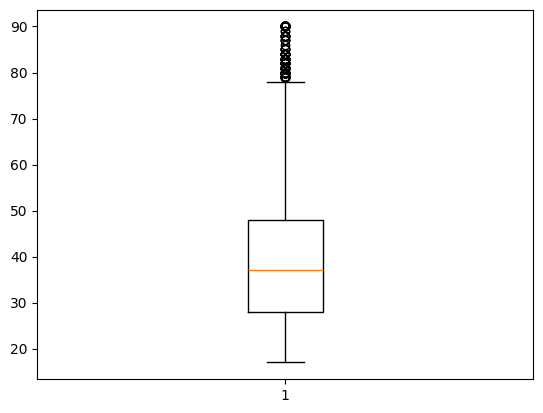

In [190]:
plt.boxplot(df['age'])
plt.show()

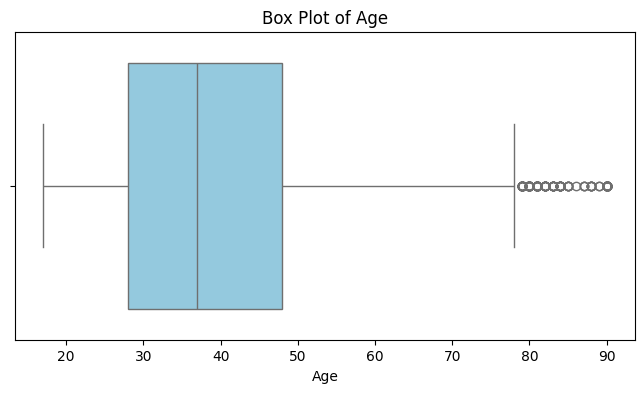

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


In [192]:
# outliers = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
# print(outliers[['age']])
# from scipy.stats import zscore
# df['zscore'] = zscore(df['age'])
# df[df['zscore'].abs() > 2]  # Outliers beyond 2 standard deviations


In [193]:
df=df[(df.age>=17) & (df.age<=75)]
# df[(df['age'] <= 75) & (df['age'] >= 17)]


In [194]:
df.workclass.value_counts()

,count
workclass,
Private,33756
Self-emp-not-inc,3796
Local-gov,3110
others,2700
State-gov,1979
Self-emp-inc,1669
Federal-gov,1428
Without-pay,21
Never-worked,10


In [195]:
from typing_extensions import Never
# in the above code 'without-pay and 'never-worked' having very less count as well as they are not earning
# so not required for income predictionb
# so we can remove such df
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']
# df[df.workclass == 'Never-Worked']

In [196]:
df.workclass.value_counts()

,count
workclass,
Private,33756
Self-emp-not-inc,3796
Local-gov,3110
others,2700
State-gov,1979
Self-emp-inc,1669
Federal-gov,1428


In [197]:
df.education.value_counts()

,count
education,
HS-grad,15655
Some-college,10824
Bachelors,7983
Masters,2634
Assoc-voc,2053
11th,1801
Assoc-acdm,1592
10th,1373
7th-8th,899


In [198]:
# here also we can eliminate some categories like '1st-4th','5th-6th','Preschool'
df=df[df['education']!='1st-4th']
df=df[df['education']!='5th-6th']
df=df[df['education']!='Preschool']

In [199]:
df.shape

(47619, 15)

In [200]:
# now the 'education' and 'education-num' are giving us same information so we will keep only one of them
# here i will remove the text df column 'education'
df.drop(columns=['education'],inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [201]:
df.tail()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [202]:
# as we know the algorithm is a mathematical expression so it cannot work on text df
# so we have to convert text df collumns in to numerical for that we will use encoder

In [203]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['workclass']=encoder.fit_transform(df['workclass'])
df['marital-status']=encoder.fit_transform(df['marital-status'])
df['occupation']=encoder.fit_transform(df['occupation'])
df['relationship']=encoder.fit_transform(df['relationship'])
df['race']=encoder.fit_transform(df['race'])
df['gender']=encoder.fit_transform(df['gender'])
df['native-country']=encoder.fit_transform(df['native-country'])
df


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,>50K
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,6,103497,10,4,14,3,4,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,<=50K
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,>50K
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,<=50K
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,<=50K


In [204]:
# spliting df in to X(independent variable) and Y (dependent variable)

In [205]:
X=df.drop(columns=['income'])
Y=df['income']
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,7,4,6,3,2,1,0,0,40,38
1,38,2,89814,9,2,4,0,4,1,0,0,50,38
2,28,1,336951,12,2,10,0,4,1,0,0,40,38
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38
4,18,6,103497,10,4,14,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38


In [206]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,>50K
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,6,103497,10,4,14,3,4,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,<=50K
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,>50K
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,<=50K
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,<=50K


In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.13793103, 0.33333333, 0.14512876, ..., 0.        , 0.39795918,
        0.92682927],
       [0.36206897, 0.33333333, 0.05245126, ..., 0.        , 0.5       ,
        0.92682927],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.92682927],
       ...,
       [0.70689655, 0.33333333, 0.09446153, ..., 0.        , 0.39795918,
        0.92682927],
       [0.0862069 , 0.33333333, 0.12800425, ..., 0.        , 0.19387755,
        0.92682927],
       [0.60344828, 0.5       , 0.18648211, ..., 0.        , 0.39795918,
        0.92682927]])

In [208]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=23, stratify=Y)


In [209]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain, ytrain)


LogisticRegression()

In [210]:
y_pred = model.predict(xtest)


In [211]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8209785804283914


In [212]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))


[[6789  417]
 [1288 1030]]
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7206
        >50K       0.71      0.44      0.55      2318

    accuracy                           0.82      9524
   macro avg       0.78      0.69      0.72      9524
weighted avg       0.81      0.82      0.81      9524



In [213]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict=knn.predict(xtest)
predict

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8182486350272995

Logistic Regression Accuracy: 0.8210
KNN Accuracy: 0.8182
Decision Tree Accuracy: 0.8079
Random Forest Accuracy: 0.8500
SVM Accuracy: 0.8420
Naive Bayes Accuracy: 0.7925
Gradient Boost Accuracy: 0.8597


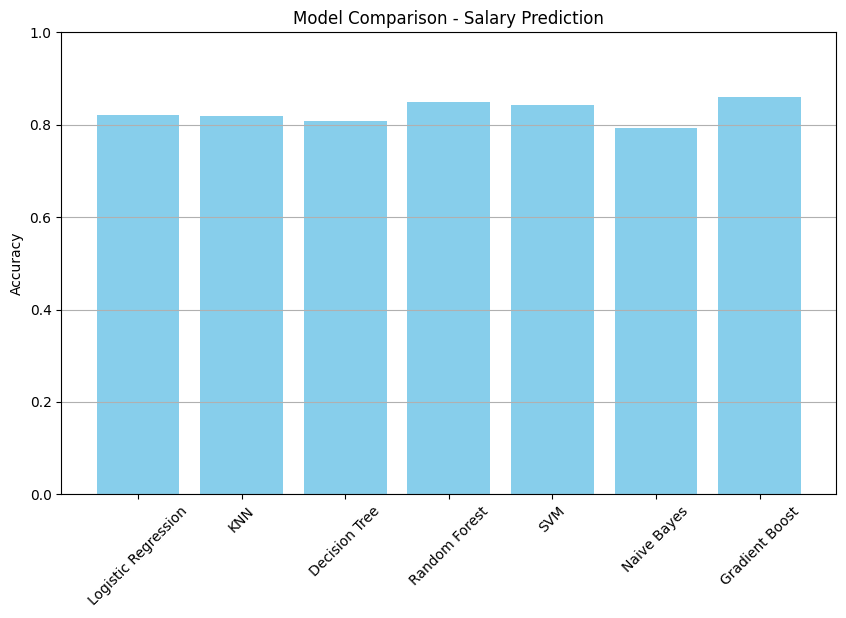

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boost": GradientBoostingClassifier()
}

accuracies = []

for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    accuracies.append(acc)
    print(f"{name} Accuracy: {acc:.4f}")

# 📊 Plotting the accuracies
plt.figure(figsize=(10,6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Salary Prediction')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


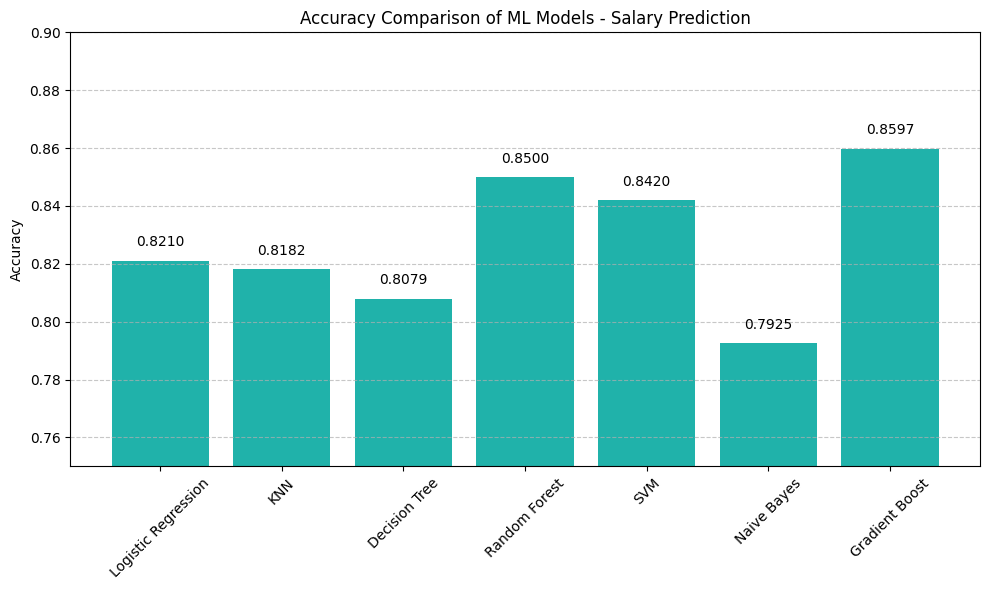

In [216]:
import matplotlib.pyplot as plt

model_names = [
    "Logistic Regression", "KNN", "Decision Tree",
    "Random Forest", "SVM", "Naive Bayes", "Gradient Boost"
]

accuracies = [
    0.8210, 0.8182, 0.8079,
    0.8500, 0.8420, 0.7925, 0.8597
]

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color='lightseagreen')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models - Salary Prediction")
plt.ylim(0.75, 0.9)

# Label the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [220]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [223]:
code = '''
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Title
st.title("Machine Learning Model Accuracy Dashboard")

# Model accuracy data
data = {
    'Model': [
        'Logistic Regression', 'KNN', 'Decision Tree',
        'Random Forest', 'SVM', 'Naive Bayes', 'Gradient Boost'
    ],
    'Accuracy': [0.8210, 0.8182, 0.8079, 0.8500, 0.8420, 0.7925, 0.8597]
}

df = pd.DataFrame(data)

# Show Data Table
st.subheader("Accuracy Table")
st.dataframe(df)

# Bar Chart
st.subheader("Accuracy Comparison (Bar Chart)")
fig, ax = plt.subplots()
ax.bar(df['Model'], df['Accuracy'], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.90)
st.pyplot(fig)

# Dropdown to select model
st.subheader("Check a Model's Accuracy")
selected_model = st.selectbox("Choose a model:", df['Model'])
selected_accuracy = df[df['Model'] == selected_model]['Accuracy'].values[0]
st.success(f"📊 Accuracy of {selected_model}: **{selected_accuracy:.4f}**")
'''
with open("app.py", "w") as f:
    f.write(code)


In [222]:
from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()

# Create tunnel
public_url = ngrok.connect(port=8501)
print(f"Your Streamlit app is live at: {public_url}")

# Run the Streamlit app
!streamlit run app.py &> /dev/null &


ERROR:pyngrok.process.ngrok:t=2025-07-20T17:48:23+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-20T17:48:23+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-20T17:48:23+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.